In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [7]:
dir = 'c.csv'
df = pd.read_csv('c.csv'.format(dir))

In [9]:
df.columns = df.columns.str.replace(" ","_")
df.columns

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA', 'AREA_NAME',
       'Rpt_Dist_No', 'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Mocodes',
       'Vict_Age', 'Vict_Sex', 'Vict_Descent', 'Premis_Cd', 'Premis_Desc',
       'Weapon_Used_Cd', 'Weapon_Desc', 'Status', 'Status_Desc', 'Crm_Cd_1',
       'Crm_Cd_2', 'Crm_Cd_3', 'Crm_Cd_4', 'LOCATION', 'Cross_Street', 'LAT',
       'LON'],
      dtype='object')

In [11]:
def change_to_time(a):
    s = str(a)
    if len(s) < 4:
        h = s[0:2]
        if int(h) > 23:
            s = "0"+ s
    return s[:2]+":"+ s[2:]

Text(0.5, 1.0, 'Sex Most affected by crimes')

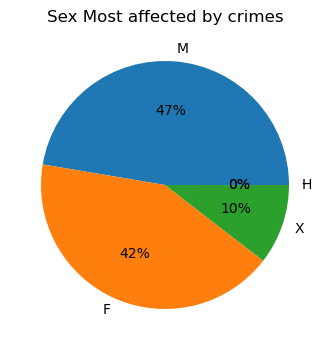

In [15]:
plt.figure(figsize=(4,12))
plt.pie(x=df['Vict_Sex'].value_counts(), labels=df['Vict_Sex'].value_counts().keys(), autopct='%.0f%%')
plt.xticks(rotation=45)
plt.title("Sex Most affected by crimes")

In [17]:
df_new  = df.query("Vict_Age > 10")

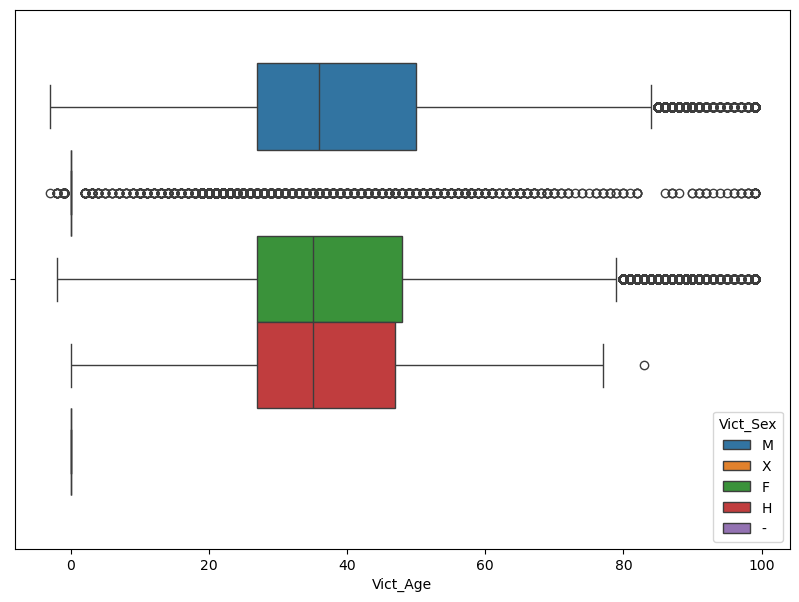

In [19]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
a = sns.boxplot(x=df['Vict_Age'],hue=df['Vict_Sex'])
# show plot
plt.show()

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140')])

<Figure size 1500x800 with 0 Axes>

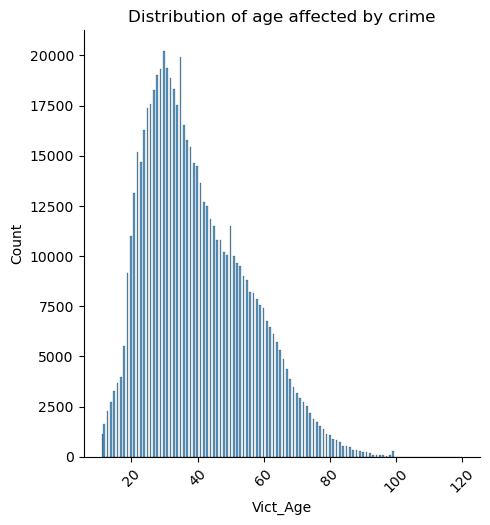

In [21]:
plt.figure(figsize=(15,8))
a = sns.displot(x=df_new['Vict_Age'])
plt.title("Distribution of age affected by crime")
plt.xticks(rotation=45)

# a.set(frame_on=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10116\1923653551.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x=df['AREA_NAME'],palette="Paired")


[None]

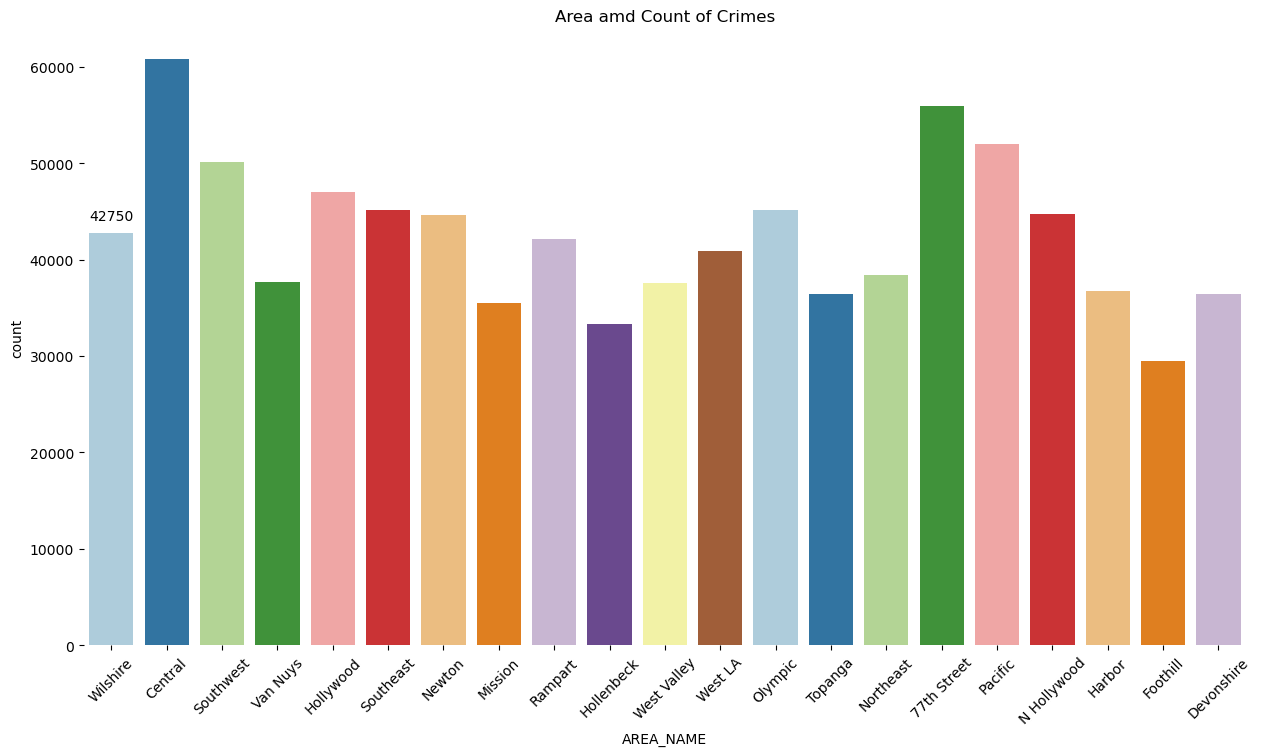

In [23]:
plt.figure(figsize=(15,8))
a = sns.countplot(x=df['AREA_NAME'],palette="Paired")
plt.title("Distribution of age affected by crime")
plt.xticks(rotation=45)
plt.bar_label(a.containers[0],padding=7.0)
plt.title("Area amd Count of Crimes")
# plt.bar_label(a.containers[1],padding=7.0)
# plt.bar_label(a.containers[2],padding=7.0)
a.set(frame_on=False)

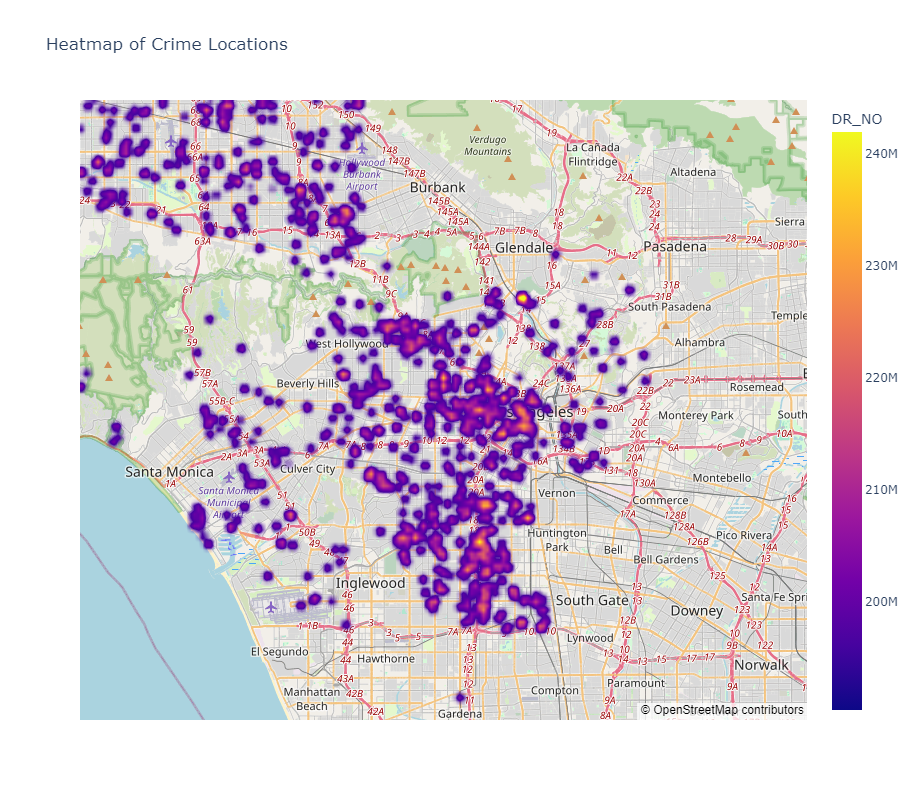

In [25]:
fig = px.density_mapbox(df.head(1000), lat = 'LAT', lon = 'LON', z = 'DR_NO',
                        radius = 8,
                        center = dict(lat =34.0545 , lon =   -118.3031),
                        zoom = 10,
                        mapbox_style = 'open-street-map',
                        width=1100,
                        height=800,
                        title="Heatmap of Crime Locations"
                        )

fig.show()

[None]

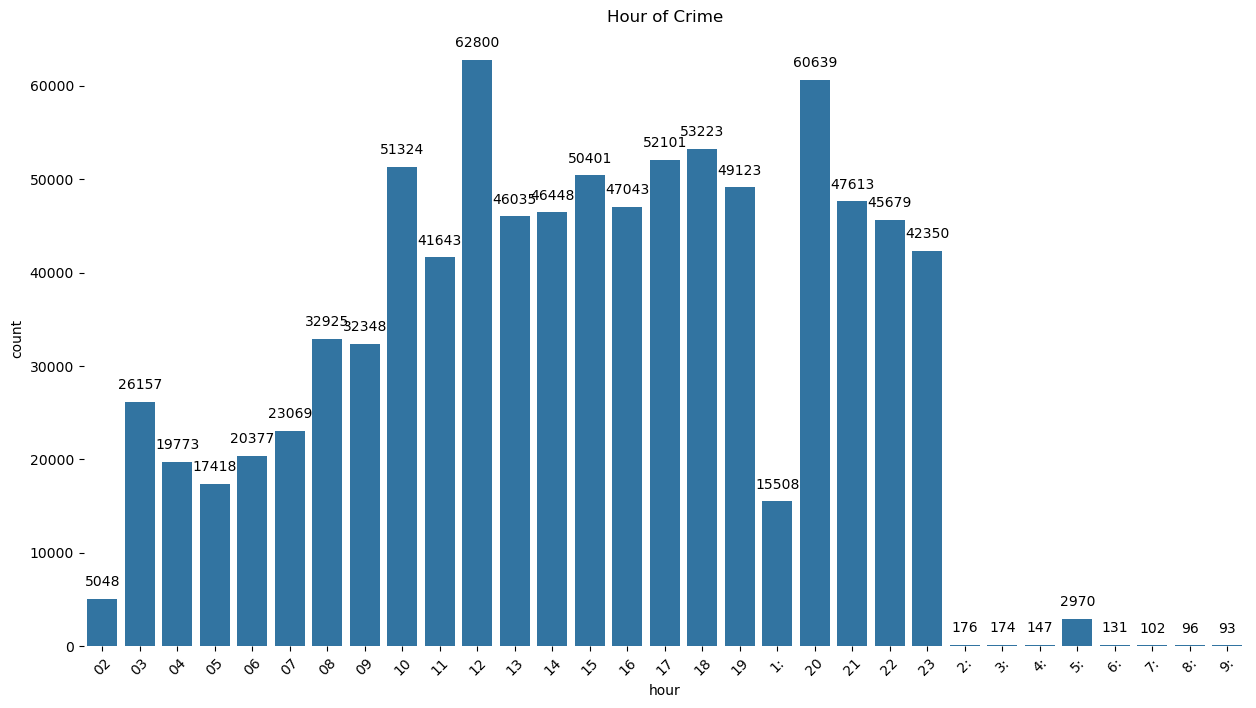

In [27]:
df.sort_values('hour', ascending = True, inplace= True)
plt.figure(figsize=(15,8))
a = sns.countplot(x=df['hour'])
plt.title("Distribution of age affected by crime")
plt.xticks(rotation=45)
plt.bar_label(a.containers[0],padding=7.0)
plt.title("Hour of Crime")
# plt.bar_label(a.containers[1],padding=7.0)
# plt.bar_label(a.containers[2],padding=7.0)
a.set(frame_on=False)

[None]

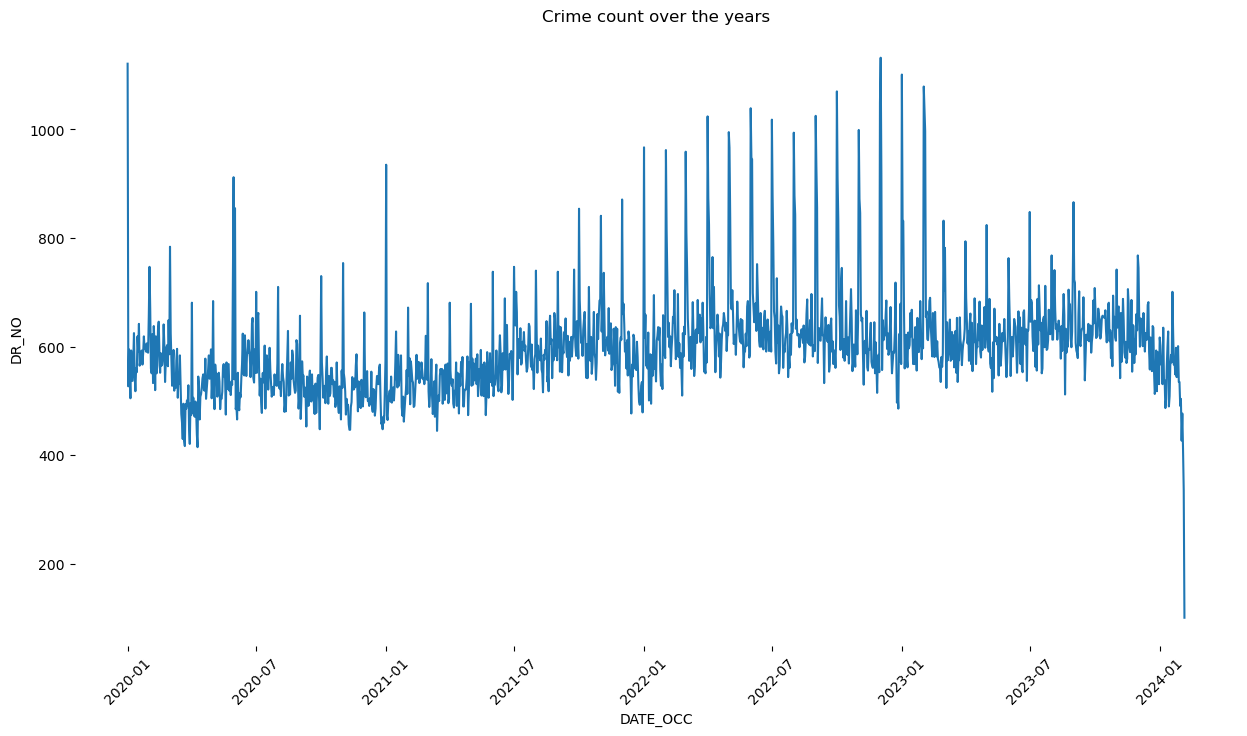

In [29]:
dd = df.groupby(df['DATE_OCC'],as_index=False)['DR_NO'].agg('count')
plt.figure(figsize=(15,8))
a = sns.lineplot(x=dd['DATE_OCC'],y=dd['DR_NO'])

plt.xticks(rotation=45)
# plt.bar_label(a.containers[0],padding=7.0)
plt.title("Crime count over the years")
a.set(frame_on=False)

[None]

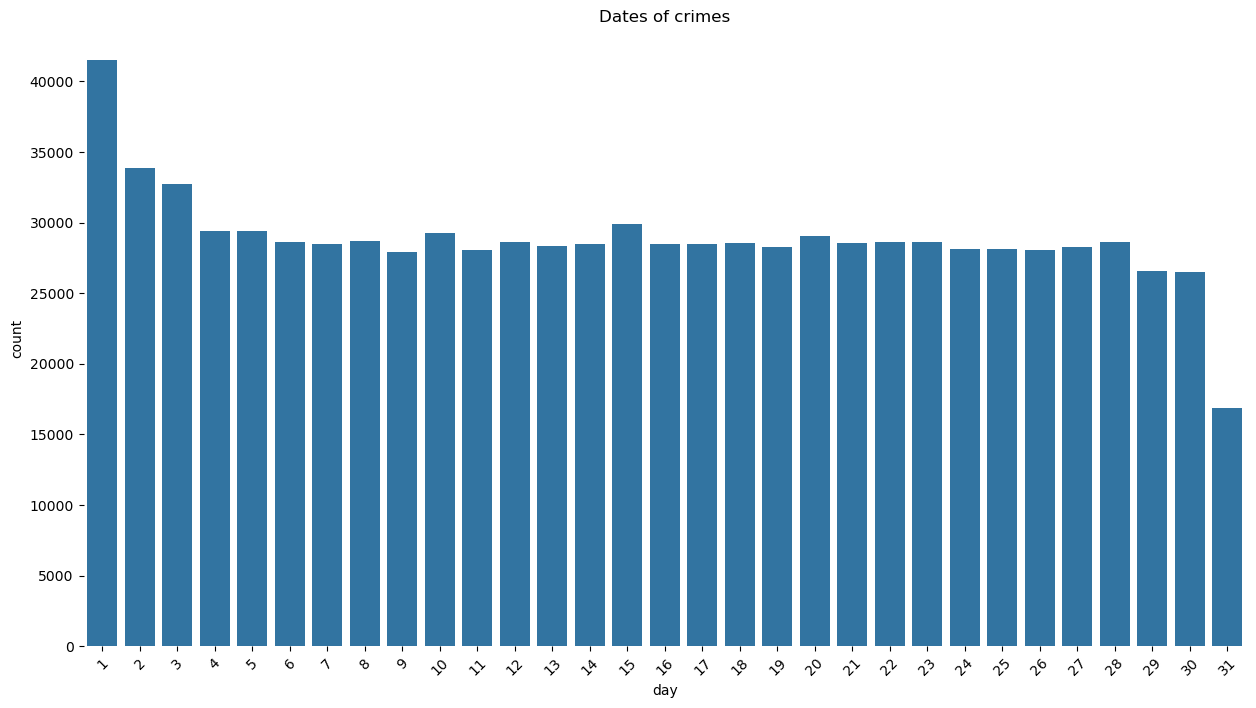

In [31]:
dd = df.groupby(df['DATE_OCC'],as_index=False)['DR_NO'].agg('count')
plt.figure(figsize=(15,8))
a = sns.countplot(x=df['day'])

plt.xticks(rotation=45)
# plt.bar_label(a.containers[0],padding=7.0)
plt.title("Dates of crimes")
a.set(frame_on=False)